In [2]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import missingno as msno
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px



In [3]:
#DATASET
from google.colab import files
upload=files.upload()


Saving players_20.csv to players_20.csv


In [4]:
player_data=pd.read_csv('players_20.csv')
player_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
#only including player stats columns
columns = ['overall','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
player_df = player_data[columns]
player_df.head()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,88,95,70,92,88,97,93,94,92,...,75,96,33,37,26,6,11,15,14,8
1,93,84,94,89,83,87,89,81,76,77,...,85,95,28,32,24,7,11,15,14,11
2,92,87,87,62,87,87,96,88,87,81,...,90,94,27,26,29,9,9,15,15,11
3,91,13,11,15,43,13,12,13,14,40,...,11,68,27,12,18,87,92,78,90,89
4,91,81,84,61,89,83,95,83,79,83,...,88,91,34,27,22,11,12,6,8,8


In [6]:
#SPLIT DATA into training and testing
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))


Length of training data: 14622
Length of testing data: 3656
Length of total data: 18278


In [7]:
#Correlation between attributes and overall
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['overall'].sort_values(ascending=False)


overall                       1.000000
movement_reactions            0.865583
mentality_composure           0.719927
power_shot_power              0.570048
mentality_vision              0.509595
attacking_short_passing       0.506783
skill_long_passing            0.492170
skill_ball_control            0.461000
power_long_shots              0.428551
skill_curve                   0.418644
mentality_aggression          0.404848
attacking_volleys             0.398905
attacking_crossing            0.392936
skill_fk_accuracy             0.391248
skill_dribbling               0.375421
power_stamina                 0.373520
power_strength                0.364329
mentality_positioning         0.359833
attacking_heading_accuracy    0.352435
mentality_penalties           0.352399
attacking_finishing           0.346992
mentality_interceptions       0.316495
defending_marking             0.303238
power_jumping                 0.272588
movement_agility              0.257805
defending_standing_tackle

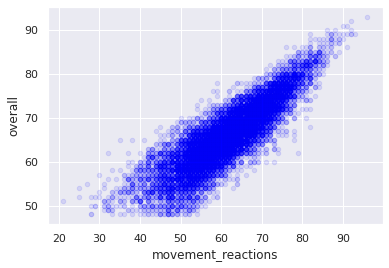

In [8]:
#Strong Corelation between movement_reaction and overall
fifa_df.plot(kind='scatter', x='movement_reactions', y='overall', alpha=0.1, color='blue')
plt.show()

In [9]:
#Prearing data for ml algorithms
y_train = train_set['overall']
X_train = train_set.drop('overall', axis=1)
y_test = test_set['overall']
X_test = test_set.drop('overall', axis=1)

In [10]:
#Importing different regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
forest_reg = RandomForestRegressor()
xg_reg = xg.XGBRegressor(objective='reg:squarederror')
models=[]
models.append(('Linear Regression', lin_reg))
models.append(('Random forest', forest_reg))
models.append(('XG Boost Regression', xg_reg))





In [24]:
#Checking which Regressing model to use for the project
names=[]
accuracy1=[]
for name,model in models:
  model.fit(X_train, y_train)
  y_predictions=model.predict(X_train)
  mse = mean_squared_error(y_train, y_predictions)
  rmse= np.sqrt(mse)
  accuracy = r2_score(y_train, y_predictions)
  accuracy1.append(accuracy)
  print(f"\nRegression report for {name} :")
  print(f"RMSE = {rmse} ")
  print(f"Accuracy= {accuracy}")
  



Regression report for Linear Regression :
RMSE = 2.493574884183225 
Accuracy= 0.8719589430994007

Regression report for Random forest :
RMSE = 0.47277749636838334 
Accuracy= 0.9953972433587894

Regression report for XG Boost Regression :
RMSE = 1.4280504447455729 
Accuracy= 0.9580055867156221


In [12]:
#Finding a good combination of Hyper-parameter values
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [13]:
#Predicting 10 instances from the test set to check the built model
final_model = grid_search.best_estimator_
some_data = X_test.iloc[:10]
some_label = y_test.iloc[:10]
print("Predictions:", np.round(final_model.predict(some_data) )  )
print("Labels:", list(some_label))


Predictions: [64. 74. 69. 67. 64. 65. 67. 56. 64. 69.]
Labels: [64, 74, 69, 68, 63, 65, 67, 58, 64, 69]


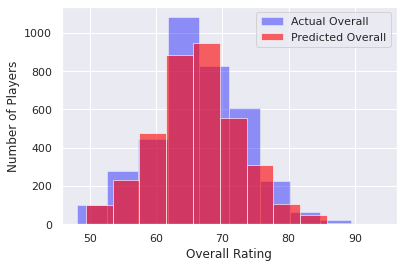

In [21]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.4)
plt.hist((final_model.predict(X_test)), color='red', label='Predicted Overall', alpha=0.6)
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.legend()
plt.show()